In [2]:
import pandas as pd
import networkx as nx
import numpy as np

# Load the CSV
file_path = "../data/discussions_anon.csv"
df = pd.read_csv(file_path)

file_path = "../data/pre_survey_anon.csv"
df_pre_all = pd.read_csv(file_path)
users_pre = df_pre_all['ParticipantID'].unique().astype(str)
print(len(users_pre))

788


In [3]:

users = df['ParticipantID'].unique().astype(str)
topics = df['post_title'].unique().astype(str)
subreddits = df['subreddit'].unique().astype(str)

topics = df['post_title'].unique().astype(str)
topics_survey = ['issue_attitudes_ukraine','issue_attitudes_renewable','issue_attitudes_immigration','issue_attitudes_fur','issue_attitudes_ubi','issue_attitudes_vaccine','issue_attitudes_airbnb','issue_attitudes_gaza','issue_attitudes_sexwork','issue_attitudes_socialmedia','issue_attitudes_healthcare','issue_attitudes_bodycams','issue_attitudes_minwage','issue_attitudes_guns','issue_attitudes_loan','issue_attitudes_deathpenalty','issue_attitudes_climate','issue_attitudes_vegetarian','issue_attitudes_ai','issue_attitudes_gender']

print(len(users))
print(topics)
print(subreddits)


335
['The US should provide financial and military aid to Ukraine.'
 'The government should not invest in renewable energy.'
 'Immigration should be regulated more strictly.'
 'Fur clothing should be banned.'
 'A universal basic income would kill the economy.'
 'Employers should mandate vaccination.'
 'Airbnb should be banned in cities.'
 "The US should condemn Israel's military actions in Gaza as acts of genocide and impose full sanctions."
 'Prostitution should be illegal.'
 'Social media is a threat to democracy.'
 'The government should not be responsible for providing universal health care.'
 'Police officers should wear body cameras.'
 'The federal minimum wage should be increased.'
 'We need stricter gun control laws.'
 'The government should not forgive student loan debt.'
 'The death penalty should be reestablished US-wide.'
 'Climate change is one of the greatest threats to humanity.'
 'There should only be vegetarian food in cantines.'
 'Artificial intelligence should replac

## Extract comments for a single topic in a single subreddit

In [6]:
tx = 6
srx = 3
filtered_df = df[df['post_title'].isin([topics[tx]])]
filtered_df = filtered_df[filtered_df['subreddit'].isin([subreddits[srx]])]
columns_to_display = ['ParticipantID', 'score_comment', 'comment_toxicity','length_comment_char']  # Replace with actual column names

pd.set_option('display.max_rows', None)
#print(df)
display(filtered_df[columns_to_display])
len(filtered_df)



,ParticipantID,score_comment,comment_toxicity,length_comment_char
3207,6454dde65b,7,0.021786,890
3208,0feeffdf7d,8,0.033099,1808
3209,255bcf36bf,3,0.040431,520
3210,20ea4d8991,3,0.110783,807
3211,95fc90d9bc,2,0.027207,266
3212,449c8ca0d4,2,0.013194,389
3213,1202299dad,2,0.006911,269
3214,045319ee07,2,0.054285,1177
3215,0feeffdf7d,2,0.064215,1437
3216,540a1e5e46,1,0.017844,209


49

## Draw the discussion as a network

In [7]:
topics[tx]

'Airbnb should be banned in cities.'

In [9]:

# Create an empty graph
graph = nx.DiGraph()  # Use DiGraph for directed graphs, or Graph for undirected

with_users = False

userset = filtered_df['ParticipantID'].unique()
if with_users:
    for user in userset:
        graph.add_node(user,color = "grey",label = user)  # Replace with your column names'

# Iterate through rows and add nodes
for ix, row in filtered_df.iterrows():
    
    user = row['ParticipantID']
    tx = np.where( topics == row['post_title']  )[0][0]
    text_len = row['length_comment_char']
    size = 5.0 + text_len/100 #np.log(len(text))
    print(tx, row['post_title'] , user, text_len)
    topic = topics_survey[tx]
    
    if user in users_pre:
        opinion = df_pre_all.loc[df_pre_all['ParticipantID'] == user,topic].iloc[0]
        print(opinion)
        if opinion <= 3: 
            rgb_tuple = ((opinion-1)/2, 0.0, 0.0) 
        else:
            rgb_tuple = (0.0, 0.0, (opinion-4)/2)
        
        color = f"rgb({int(rgb_tuple[0] * 255)},{int(rgb_tuple[1] * 255)},{int(rgb_tuple[2] * 255)})"

        #color = [0 , 0 , opinion]
    else:
        rgb_tuple = (0.1, 0.9, 0.1)
        color = f"rgb({int(rgb_tuple[0] * 255)},{int(rgb_tuple[1] * 255)},{int(rgb_tuple[2] * 255)})"
    
    #graph.add_node(row['comment_id'],color = color,size = abs(4*row['score_comment']+1),label = row['ParticipantID'])
    graph.add_node(row['comment_id'],color = color,size = size, label = user)
    #print(row['ParticipantID'])
    #if row['score_comment'] < 0:
    #    graph.add_node(row['comment_id'],color = "red",size = abs(4*row['score_comment']+1),label = row['ParticipantID'])
    #else:
    #    graph.add_node(row['comment_id'],color = "blue",size = abs(4*row['score_comment']+1),label = row['ParticipantID'])
    if with_users: 
        graph.add_edge(row['ParticipantID'], row['comment_id'])  # Replace with your column names
    graph.add_edge(row['comment_id'],row['parent_id'])


from pyvis.network import Network

# Example: Create a Pyvis Network
net = Network(
    notebook=True,
    height="750px",
    width="100%",
    directed=True,
    bgcolor="#ffffff",
    font_color="black",
    cdn_resources="in_line"  # Fix for Jupyter display issues
)
# Convert NetworkX graph to Pyvis graph
net.from_nx(graph)

# Show the interactive graph
net.show("interactive_graph.html")


6 Airbnb should be banned in cities. 6454dde65b 890
2.0
6 Airbnb should be banned in cities. 0feeffdf7d 1808
1.0
6 Airbnb should be banned in cities. 255bcf36bf 520
1.0
6 Airbnb should be banned in cities. 20ea4d8991 807
6.0
6 Airbnb should be banned in cities. 95fc90d9bc 266
3.0
6 Airbnb should be banned in cities. 449c8ca0d4 389
2.0
6 Airbnb should be banned in cities. 1202299dad 269
6.0
6 Airbnb should be banned in cities. 045319ee07 1177
2.0
6 Airbnb should be banned in cities. 0feeffdf7d 1437
1.0
6 Airbnb should be banned in cities. 540a1e5e46 209
3.0
6 Airbnb should be banned in cities. c5e82b5fee 217
2.0
6 Airbnb should be banned in cities. 122c06368f 335
5.0
6 Airbnb should be banned in cities. 5411f6ab06 178
4.0
6 Airbnb should be banned in cities. 2eb22b1c67 128
4.0
6 Airbnb should be banned in cities. ac9ed1acf6 425
1.0
6 Airbnb should be banned in cities. bae37c6a38 1697
1.0
6 Airbnb should be banned in cities. c5ab0ed347 155
2.0
6 Airbnb should be banned in cities. 55b8618

In [10]:
np.where(topics == topics[10])[0][0]
df_pre_all.loc[ df_pre_all['ParticipantID'] == user,topic]

737    1.0
Name: issue_attitudes_airbnb, dtype: float64

Things like gender-neutral language and stating pronouns are silly issues.


/var/folders/52/9916k5xs3kvdtcq2qd98b7x00000gn/T/ipykernel_96428/4022578039.py:25: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if target_user and target_user in users_pre:


[[10. 11. 13. 18.  7. 30.]
 [13. 27.  5. 16.  7. 14.]
 [11.  9.  5. 21.  1. 14.]
 [18. 12. 20.  4.  1. 12.]
 [ 4.  7.  0.  1.  0.  1.]
 [28. 11. 11.  9.  2. 11.]]
[[0.11235955 0.12359551 0.14606742 0.20224719 0.07865169 0.33707865]
 [0.15853659 0.32926829 0.06097561 0.19512195 0.08536585 0.17073171]
 [0.18032787 0.14754098 0.08196721 0.3442623  0.01639344 0.2295082 ]
 [0.26865672 0.17910448 0.29850746 0.05970149 0.01492537 0.17910448]
 [0.30769231 0.53846154 0.         0.07692308 0.         0.07692308]
 [0.38888889 0.15277778 0.15277778 0.125      0.02777778 0.15277778]]


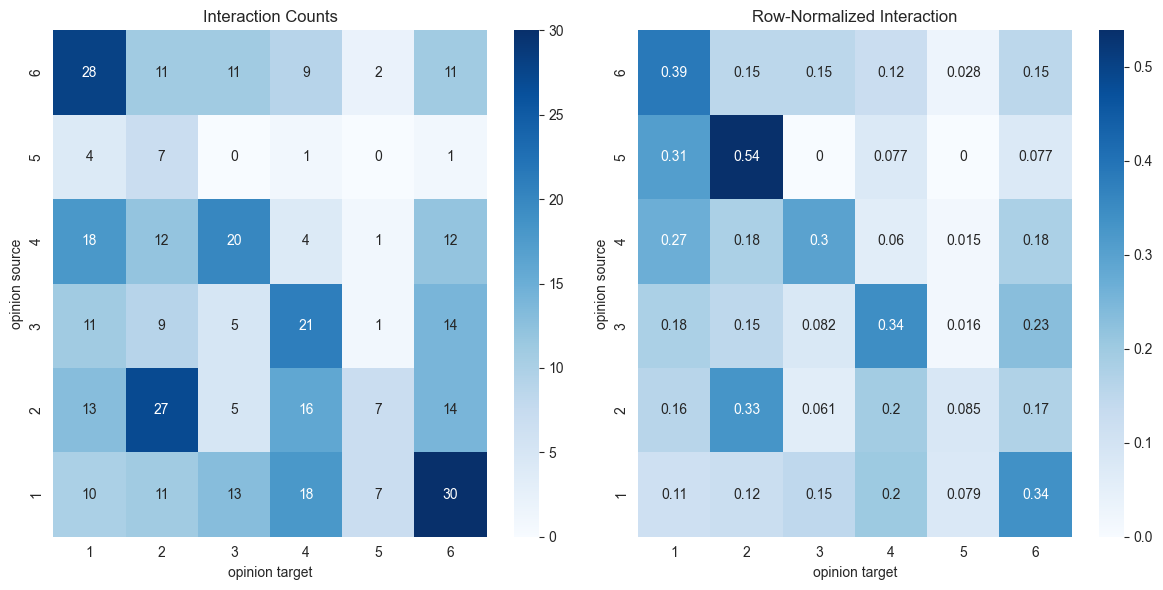

In [11]:

users_pre = df_pre_all['ParticipantID'].unique().astype(str)

tx = 19
srx = 4
#filtered_df=df
filtered_df = df[df['post_title'].isin([topics[tx]])]
print(topics[tx])
#filtered_df = filtered_df[df['subreddit'].isin([subreddits[srx]])]
#print(subreddits[srx])

paircounts = np.zeros((6, 6))
row_sums = np.zeros(6)
opinion_count_all = np.zeros(6)

for ix, row in filtered_df.iterrows():
    user = row['ParticipantID']  
    tx = np.where( topics == row['post_title'] )[0][0]
    topic = topics_survey[tx]
    if user in users_pre:     
        source_opinion = df_pre_all.loc[df_pre_all['ParticipantID'] == user, topic].iloc[0]
        opinion_count_all[int(source_opinion)-1]+=1
        target_id = row['parent_id']
        target_comment = df[ df['comment_id'] == target_id ]
        target_user = target_comment['ParticipantID'].values
        if target_user and target_user in users_pre:
            #print(user)
            target_opinion = df_pre_all.loc[df_pre_all['ParticipantID'] == target_user[0], topic].iloc[0]
            paircounts[int(source_opinion)-1,int(target_opinion)-1]+=1
            row_sums[int(source_opinion)-1]+=1
            #print( source_opinion, target_opinion , user, target_user)
        else:
            pass
        #
        #print(  target_opinion  )


print(paircounts)

paircounts_rownorm = np.zeros((6, 6))
for i in range(6):
    if row_sums[i] > 0:  # Avoid division by zero
        paircounts_rownorm[i] = paircounts[i] / row_sums[i]
        
print(paircounts_rownorm)

import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with two subplots (side by side)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot paircounts (raw counts)
sns.heatmap(paircounts, annot=True,fmt=".0f" ,cmap="Blues", xticklabels=range(1, 7), yticklabels=range(1, 7), ax=axes[0])
axes[0].set_xlabel("opinion target")
axes[0].set_ylabel("opinion source")
axes[0].set_title("Interaction Counts")
axes[0].invert_yaxis()  # Fix y-axis order

# Plot paircounts_rownormalized
sns.heatmap(paircounts_rownorm, annot=True, cmap="Blues", xticklabels=range(1, 7), yticklabels=range(1, 7), ax=axes[1])
axes[1].set_xlabel("opinion target")
axes[1].set_ylabel("opinion source")
axes[1].set_title("Row-Normalized Interaction")
axes[1].invert_yaxis()  # Fix y-axis order

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


## Get discussion participation per subreddit and topic

[122. 123.  82.  88.  33.  89.]
[0.22718808 0.22905028 0.15270019 0.16387337 0.06145251 0.16573557]
[[0.05161442 0.05203749 0.03469166 0.03723008 0.01396128 0.03765315]
 [0.05203749 0.05246403 0.03497602 0.03753524 0.01407572 0.03796178]
 [0.03469166 0.03497602 0.02331735 0.02502349 0.00938381 0.02530785]
 [0.03723008 0.03753524 0.02502349 0.02685448 0.01007043 0.02715965]
 [0.01396128 0.01407572 0.00938381 0.01007043 0.00377641 0.01018487]
 [0.03765315 0.03796178 0.02530785 0.02715965 0.01018487 0.02746828]]
[[0.02604167 0.02864583 0.03385417 0.046875   0.01822917 0.078125  ]
 [0.03385417 0.0703125  0.01302083 0.04166667 0.01822917 0.03645833]
 [0.02864583 0.0234375  0.01302083 0.0546875  0.00260417 0.03645833]
 [0.046875   0.03125    0.05208333 0.01041667 0.00260417 0.03125   ]
 [0.01041667 0.01822917 0.         0.00260417 0.         0.00260417]
 [0.07291667 0.02864583 0.02864583 0.0234375  0.00520833 0.02864583]]


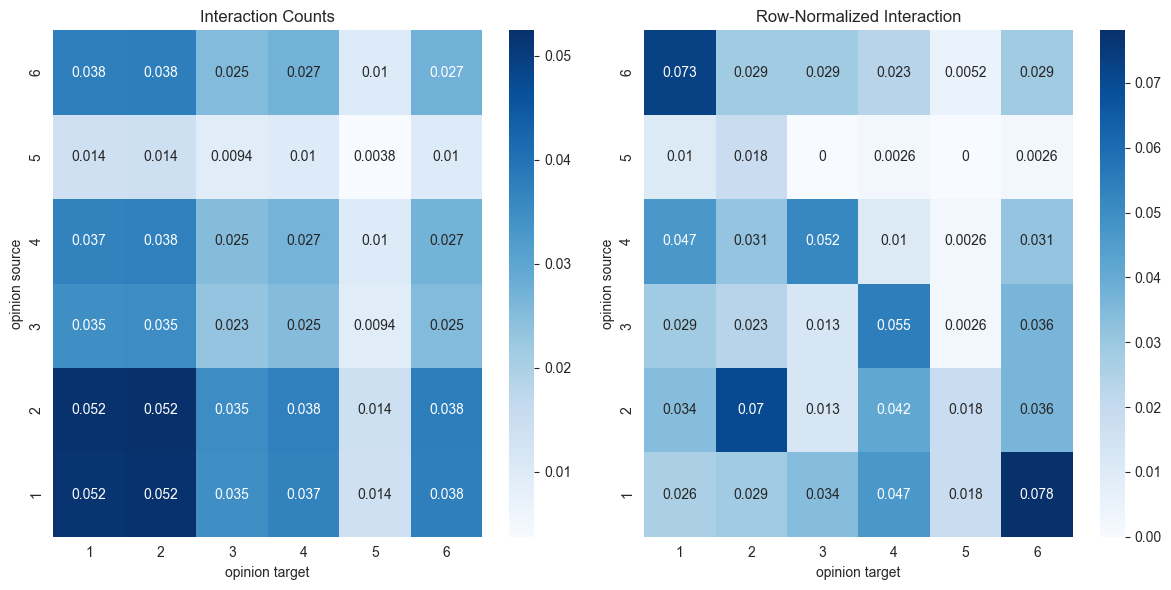

In [12]:
print(opinion_count_all)
opinion_freq_all = opinion_count_all/sum(opinion_count_all)
print(opinion_freq_all)
paircounts_null = np.zeros((6, 6))
for ix,oi in enumerate(opinion_freq_all):
    for jx,oj in enumerate(opinion_freq_all):
        paircounts_null[ix,jx] = opinion_freq_all[ix]*opinion_freq_all[jx]
    
paircounts_norm = paircounts/np.sum(paircounts)
print(paircounts_null)
print(paircounts_norm)

# Create a figure with two subplots (side by side)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot paircounts (raw counts)
sns.heatmap(paircounts_null, annot=True ,cmap="Blues", xticklabels=range(1, 7), yticklabels=range(1, 7), ax=axes[0])
axes[0].set_xlabel("opinion target")
axes[0].set_ylabel("opinion source")
axes[0].set_title("Interaction Counts")
axes[0].invert_yaxis()  # Fix y-axis order

# # Plot paircounts_rownormalized
sns.heatmap(paircounts_norm, annot=True, cmap="Blues", xticklabels=range(1, 7), yticklabels=range(1, 7), ax=axes[1])
axes[1].set_xlabel("opinion target")
axes[1].set_ylabel("opinion source")
axes[1].set_title("Row-Normalized Interaction")
axes[1].invert_yaxis()  # Fix y-axis order

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


[30. 21. 39. 42. 39. 57. 45. 32. 36. 15. 28.]


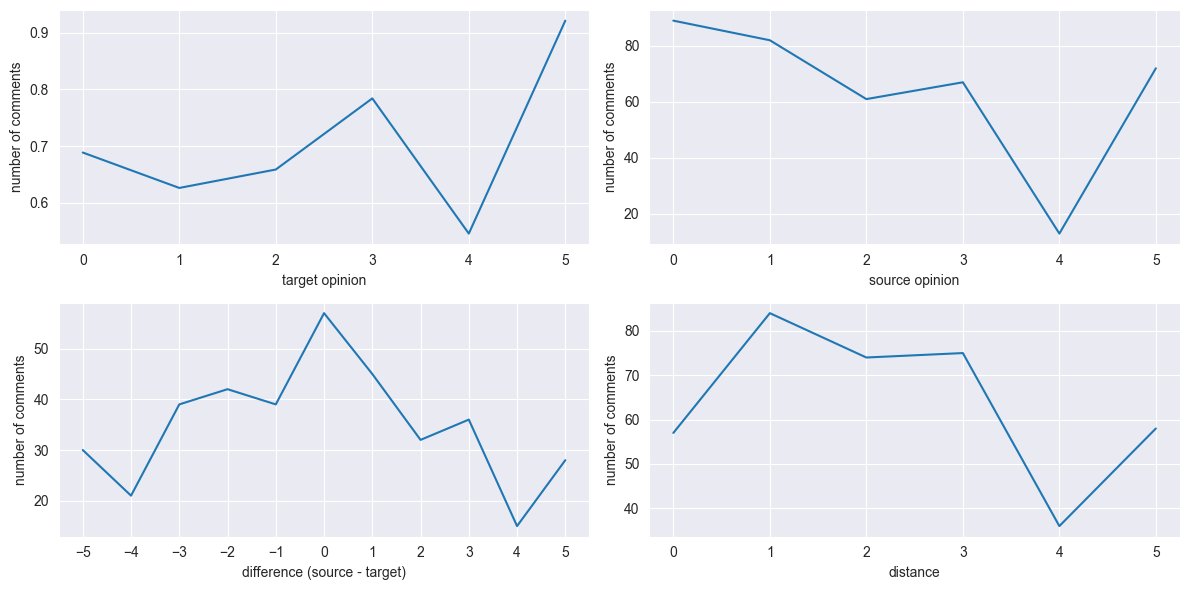

In [13]:


paircounts_diff = np.zeros(11)
paircounts_dist = np.zeros(6)
paircounts_target = np.zeros(6)
paircounts_source = np.zeros(6)

for i in range(6):
    for j in range(6):
        diff = i-j
        dist = abs(diff)
        paircounts_diff[diff+5] += paircounts[i][j]
        paircounts_dist[dist] += paircounts[i][j]#/(6-dist)
        #paircounts_diff[diff+5] += paircounts_rownorm[i][j]
        #paircounts_dist[dist] += paircounts_rownorm[i][j]

        paircounts_target[j] += paircounts[i][j]
        paircounts_source[i] += paircounts[i][j]
        


print(paircounts_diff)

# Create a figure with two subplots (side by side)
fig, axes = plt.subplots(2, 2, figsize=(12, 6))

data = paircounts_diff

# Plot paircounts (raw counts)
axes[1,0].plot(np.linspace(-5, 5, len(data)),data)
axes[1,0].set_xlabel("difference (source - target)")
axes[1,0].set_xticks(np.linspace(-5, 5,len(data)))
axes[1,0].set_ylabel("number of comments")
#axes[0].set_title("Interaction Counts")


data = paircounts_dist
axes[1,1].plot(data)
axes[1,1].set_xlabel("distance")
axes[1,1].set_ylabel("number of comments")
#axes[1].set_title("Row-Normalized Interaction")


data = paircounts_target
#axes[0,0].plot(data)
#axes[0,0].plot(opinion_count_all)
axes[0,0].plot(data/opinion_count_all)
axes[0,0].set_xlabel("target opinion")
axes[0,0].set_ylabel("number of comments")

data = paircounts_source
axes[0,1].plot(data)
axes[0,1].set_xlabel("source opinion")
axes[0,1].set_ylabel("number of comments")


# Adjust layout for better spacing
plt.tight_layout()
plt.show()


In [14]:

tx = 16
srx = 1
filtered_df = df[df['post_title'].isin([topics[tx]])]
filtered_df = filtered_df[filtered_df['subreddit'].isin([subreddits[srx]])]
activeUsers = list(filtered_df.ParticipantID)
activeUsers

#columns_to_display = ['ParticipantID', 'score_comment', 'text_comment']  # Replace with actual column names
#display(filtered_df[columns_to_display])
#len(filtered_df)


['4a7c899423',
 '20e8bf48c6',
 '8cf7a0267b',
 '538f31424c',
 'e35b57c4fa',
 '415423b932',
 'f042fd1a80',
 '020aacb6ae',
 'a5054de0d3',
 '504604c131',
 '718906de57',
 'd47304de2f',
 '22ae244c18',
 'c835a7a95a',
 '04df080c10',
 '7a23fe4e17',
 'ab67c11202',
 'ab76f1db6c',
 'c7934283f5',
 '6598c5d087',
 '5bc8502490',
 '1ff83e22aa',
 'e35b57c4fa',
 'ab76f1db6c',
 '718906de57',
 'c8ab9fcde2',
 'f042fd1a80',
 '04e12eb8bc',
 '1ff83e22aa',
 '718906de57',
 'a5054de0d3',
 'ab67c11202',
 'ab76f1db6c',
 'a5054de0d3']

In [15]:
filtered_df

,Unnamed: 0,ParticipantID,parent_id,root_comment,created_comment,subreddit,created_post,score_comment,comment_id,score_post,text_post,post_id,post_title,comment_toxicity,post_date,Collected comments,total_views,length_comment_char
1207,1208,4a7c899423,t3_1dl3qz5,1,2024-06-21 16:45:32,DiscussPolitics2,2024-06-21 13:15:09,8,t1_l9mzo62,7,Please discuss! This statement serves as start...,t3_1dl3qz5,Climate change is one of the greatest threats ...,0.338998,2024-06-21,34,613.0,1132
1208,1209,20e8bf48c6,t3_1dl3qz5,1,2024-06-21 14:02:05,DiscussPolitics2,2024-06-21 13:15:09,10,t1_l9m7n2w,7,Please discuss! This statement serves as start...,t3_1dl3qz5,Climate change is one of the greatest threats ...,0.032863,2024-06-21,34,613.0,479
1209,1210,8cf7a0267b,t3_1dl3qz5,1,2024-06-21 19:54:14,DiscussPolitics2,2024-06-21 13:15:09,5,t1_l9nwkgf,7,Please discuss! This statement serves as start...,t3_1dl3qz5,Climate change is one of the greatest threats ...,0.094817,2024-06-21,34,613.0,529
1210,1211,538f31424c,t3_1dl3qz5,1,2024-06-21 22:43:52,DiscussPolitics2,2024-06-21 13:15:09,3,t1_l9ooag7,7,Please discuss! This statement serves as start...,t3_1dl3qz5,Climate change is one of the greatest threats ...,0.016210,2024-06-21,34,613.0,93
1211,1212,e35b57c4fa,t3_1dl3qz5,1,2024-06-22 02:26:56,DiscussPolitics2,2024-06-21 13:15:09,3,t1_l9pjy9i,7,Please discuss! This statement serves as start...,t3_1dl3qz5,Climate change is one of the greatest threats ...,0.042410,2024-06-21,34,613.0,271
1212,1213,415423b932,t3_1dl3qz5,1,2024-06-22 04:19:13,DiscussPolitics2,2024-06-21 13:15:09,2,t1_l9pxs4r,7,Please discuss! This statement serves as start...,t3_1dl3qz5,Climate change is one of the greatest threats ...,0.017844,2024-06-21,34,613.0,360
1213,1214,f042fd1a80,t3_1dl3qz5,1,2024-06-22 06:13:51,DiscussPolitics2,2024-06-21 13:15:09,2,t1_l9q97oq,7,Please discuss! This statement serves as start...,t3_1dl3qz5,Climate change is one of the greatest threats ...,0.012315,2024-06-21,34,613.0,15
1214,1215,020aacb6ae,t3_1dl3qz5,1,2024-06-21 20:07:54,DiscussPolitics2,2024-06-21 13:15:09,1,t1_l9nyx92,7,Please discuss! This statement serves as start...,t3_1dl3qz5,Climate change is one of the greatest threats ...,0.016210,2024-06-21,34,613.0,85
1215,1216,a5054de0d3,t3_1dl3qz5,1,2024-06-22 09:12:12,DiscussPolitics2,2024-06-21 13:15:09,1,t1_l9qo5zo,7,Please discuss! This statement serves as start...,t3_1dl3qz5,Climate change is one of the greatest threats ...,0.050574,2024-06-21,34,613.0,904
1216,1217,504604c131,t3_1dl3qz5,1,2024-06-22 14:16:15,DiscussPolitics2,2024-06-21 13:15:09,1,t1_l9rkcty,7,Please discuss! This statement serves as start...,t3_1dl3qz5,Climate change is one of the greatest threats ...,0.008042,2024-06-21,34,613.0,8


In [ ]:
id_list = ['4aa8b19edf', 'fc37bfdd35', 'ID3']
# Filter the DataFrame
filtered_df = df[df['ParticipantID'].isin(id_list)]
len(filtered_df)